In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [2]:
# Hyperparameters
input_size = 784 # 28x28 images flattened
hidden_size = 128
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001
# MNIST dataset
transform = transforms.Compose([
transforms.ToTensor(),
transforms.Normalize((0.5,), (0.5,)) # Normalizing the dataset
])

In [5]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
 transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
 transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size,
 shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size,
 shuffle=False)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 51.3MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.64MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 13.9MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.79MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
# Multilayer Perceptron Model
class MLP(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)
  def forward(self, x):
    x = x.view(-1, input_size) # Flatten the image to a 1D vector
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    return x
model = MLP(input_size, hidden_size, num_classes)
print(model)

MLP(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [9]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
 # Training the model
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
 # Forward pass
   outputs = model(images)
   loss = criterion(outputs, labels)
 # Backward pass and optimization
   optimizer.zero_grad()
   loss.backward()
   optimizer.step()
   if (i+1) % 100 == 0:
    print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/5], Step [100/600], Loss: 0.4158
Epoch [1/5], Step [200/600], Loss: 0.3530
Epoch [1/5], Step [300/600], Loss: 0.3412
Epoch [1/5], Step [400/600], Loss: 0.2194
Epoch [1/5], Step [500/600], Loss: 0.3481
Epoch [1/5], Step [600/600], Loss: 0.4607
Epoch [2/5], Step [100/600], Loss: 0.2733
Epoch [2/5], Step [200/600], Loss: 0.3612
Epoch [2/5], Step [300/600], Loss: 0.1632
Epoch [2/5], Step [400/600], Loss: 0.1891
Epoch [2/5], Step [500/600], Loss: 0.2685
Epoch [2/5], Step [600/600], Loss: 0.2039
Epoch [3/5], Step [100/600], Loss: 0.1888
Epoch [3/5], Step [200/600], Loss: 0.1794
Epoch [3/5], Step [300/600], Loss: 0.1872
Epoch [3/5], Step [400/600], Loss: 0.1619
Epoch [3/5], Step [500/600], Loss: 0.1088
Epoch [3/5], Step [600/600], Loss: 0.1016
Epoch [4/5], Step [100/600], Loss: 0.0864
Epoch [4/5], Step [200/600], Loss: 0.1889
Epoch [4/5], Step [300/600], Loss: 0.1167
Epoch [4/5], Step [400/600], Loss: 0.1215
Epoch [4/5], Step [500/600], Loss: 0.1699
Epoch [4/5], Step [600/600], Loss:

In [10]:
# Testing the model
model.eval() # Set model to evaluation mode
with torch.no_grad():
 correct = 0
 total = 0
 for images, labels in test_loader:
  outputs = model(images)
  _, predicted = torch.max(outputs.data, 1)
  total += labels.size(0)
  correct += (predicted == labels).sum().item()
 print(f'Accuracy of the model on the 10,000 test images: {100 * correct /total:.2f}%')
 # Saving the model
 torch.save(model.state_dict(), 'mlp_mnist.pth')

Accuracy of the model on the 10,000 test images: 96.26%


In [11]:
import matplotlib.pyplot as plt
import torchvision
 # Function to display a row of images with their predicted and true labels
def show_images(images, labels, preds, title):
 fig, axes = plt.subplots(1, 10, figsize=(20, 2)) # Create a row of 10␣subplots
 for i in range(10):
  axes[i].imshow(images[i].squeeze(), cmap='gray')
  axes[i].set_title(f'True: {labels[i]}\nPred: {preds[i]}')
  axes[i].axis('off') # Hide axis
 fig.suptitle(title, fontsize=16)
 plt.show()
 # Set the model to evaluation mode
 model.eval()
 # Collecting correctly and incorrectly classified images
 correct_examples = []
 incorrect_examples = []
 with torch.no_grad():
  for images, labels in test_loader:
   outputs = model(images)
 _, predicted = torch.max(outputs.data, 1)
 for img, label, pred in zip(images, labels, predicted):
  if label == pred and len(correct_examples) < 10:
   correct_examples.append((img, label.item(), pred.item()))
  elif label != pred and len(incorrect_examples) < 10:
   incorrect_examples.append((img, label.item(), pred.item()))
 # Break if we have collected enough examples
  if len(correct_examples) >= 10 and len(incorrect_examples) >= 10:
     break
  if len(correct_examples) >= 10 and len(incorrect_examples) >= 10:
     break

# Prepare data for visualization
 correct_images = [img for img, _, _ in correct_examples]
 correct_labels = [label for _, label, _ in correct_examples]
 correct_preds = [pred for _, _, pred in correct_examples]
 incorrect_images = [img for img, _, _ in incorrect_examples]
 incorrect_labels = [label for _, label, _ in incorrect_examples]
 incorrect_preds = [pred for _, _, pred in incorrect_examples]
 # Visualizing Correctly Classified Images
 print("Correctly Classified Examples:")
 show_images(correct_images, correct_labels, correct_preds, title='')
 # Visualizing Incorrectly Classified Images
 print("Incorrectly Classified Examples:")
 show_images(incorrect_images, incorrect_labels, incorrect_preds, title='')

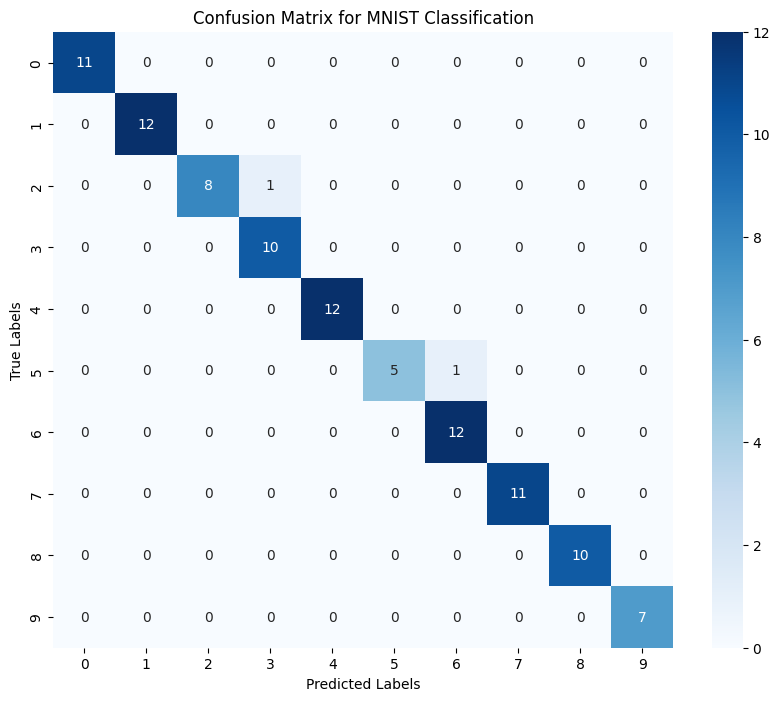

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
# Initialize the confusion matrix
confusion_mat = np.zeros((num_classes, num_classes))
# Set the model to evaluation mode
model.eval()
# Collect true labels and predictions
all_labels = []
all_preds = []
with torch.no_grad():
 for images, labels in test_loader:
  outputs = model(images)
 _, predicted = torch.max(outputs.data, 1)
 all_labels.extend(labels.cpu().numpy())
 all_preds.extend(predicted.cpu().numpy())
 # Calculate the confusion matrix
 confusion_mat = confusion_matrix(all_labels, all_preds)
 # Plotting the confusion matrix
 plt.figure(figsize=(10, 8))
 sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',xticklabels=range(10), yticklabels=range(10))
 plt.xlabel('Predicted Labels')
 plt.ylabel('True Labels')
 plt.title('Confusion Matrix for MNIST Classification')
 plt.show()